In [1]:
import pandas as pd
import numpy as np
import datetime 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import geopandas as gpd

In [2]:
empSt = pd.read_csv("../newDat/geog/empSt_final.csv")
emp = pd.read_csv("../newDat/geog/emp_final.csv")
work = pd.read_csv("../newDat/geog/work_final.csv")
workSt = pd.read_csv("../newDat/geog/workSt_final.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8,15,16,23,24,31,32,39,40,47,48,55,56,63,64,71,72,79,80,87,88,95,96,103,104,111,112,119,120,127,128,135,136,143,144,151,152,159,160,383,384) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8,15,16,23,24,31,32,39,40,47,48,55,56,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
empSt.head()

,Unnamed: 0,STATE,empSt_15Q1_CERT_APP,empSt_15Q1_CERT_WORKER,empSt_15Q1_CERT_AVGSAL,empSt_15Q1_CERT_AVGPW,empSt_15Q1_CERT_TOPNAIC5,empSt_15Q1_CERT_TOPJOB,empSt_15Q1_CERT_TOPCITY,empSt_15Q1_CERT_PCTINSTATE,empSt_15Q1_CERTWD_APP,empSt_15Q1_CERTWD_WORKER,empSt_15Q1_CERTWD_AVGSAL,empSt_15Q1_CERTWD_AVGPW,empSt_15Q1_CERTWD_TOPNAIC5,empSt_15Q1_CERTWD_TOPJOB,empSt_15Q1_CERTWD_TOPCITY,empSt_15Q1_CERTWD_PCTINSTATE,empSt_15Q1_DEN_APP,empSt_15Q1_DEN_WORKER,empSt_15Q1_DEN_AVGSAL,empSt_15Q1_DEN_AVGPW,empSt_15Q1_DEN_TOPNAIC5,empSt_15Q1_DEN_TOPJOB,empSt_15Q1_DEN_TOPCITY,empSt_15Q1_DEN_PCTINSTATE,empSt_15Q1_WD_APP,empSt_15Q1_WD_WORKER,empSt_15Q1_WD_AVGSAL,empSt_15Q1_WD_AVGPW,empSt_15Q1_WD_TOPNAIC5,empSt_15Q1_WD_TOPJOB,empSt_15Q1_WD_TOPCITY,empSt_15Q1_WD_PCTINSTATE,empSt_15Q2_CERT_APP,empSt_15Q2_CERT_WORKER,empSt_15Q2_CERT_AVGSAL,empSt_15Q2_CERT_AVGPW,empSt_15Q2_CERT_TOPNAIC5,empSt_15Q2_CERT_TOPJOB,empSt_15Q2_CERT_TOPCITY,empSt_15Q2_CERT_PCTINSTATE,empSt_15Q2_CERTWD_APP,empSt_15Q2_CERTWD_WORKER,empSt_15Q2_CERTWD_AVGSAL,empSt_15Q2_CERTWD_AVGPW,empSt_15Q2_CERTWD_TOPNAIC5,empSt_15Q2_CERTWD_TOPJOB,empSt_15Q2_CERTWD_TOPCITY,empSt_15Q2_CERTWD_PCTINSTATE,empSt_15Q2_DEN_APP,empSt_15Q2_DEN_WORKER,empSt_15Q2_DEN_AVGSAL,empSt_15Q2_DEN_AVGPW,empSt_15Q2_DEN_TOPNAIC5,empSt_15Q2_DEN_TOPJOB,empSt_15Q2_DEN_TOPCITY,empSt_15Q2_DEN_PCTINSTATE,empSt_15Q2_WD_APP,empSt_15Q2_WD_WORKER,empSt_15Q2_WD_AVGSAL,empSt_15Q2_WD_AVGPW,empSt_15Q2_WD_TOPNAIC5,empSt_15Q2_WD_TOPJOB,empSt_15Q2_WD_TOPCITY,empSt_15Q2_WD_PCTINSTATE,empSt_15Q3_CERT_APP,empSt_15Q3_CERT_WORKER,empSt_15Q3_CERT_AVGSAL,empSt_15Q3_CERT_AVGPW,empSt_15Q3_CERT_TOPNAIC5,empSt_15Q3_CERT_TOPJOB,empSt_15Q3_CERT_TOPCITY,empSt_15Q3_CERT_PCTINSTATE,empSt_15Q3_CERTWD_APP,empSt_15Q3_CERTWD_WORKER,empSt_15Q3_CERTWD_AVGSAL,empSt_15Q3_CERTWD_AVGPW,empSt_15Q3_CERTWD_TOPNAIC5,empSt_15Q3_CERTWD_TOPJOB,empSt_15Q3_CERTWD_TOPCITY,empSt_15Q3_CERTWD_PCTINSTATE,empSt_15Q3_DEN_APP,empSt_15Q3_DEN_WORKER,empSt_15Q3_DEN_AVGSAL,empSt_15Q3_DEN_AVGPW,empSt_15Q3_DEN_TOPNAIC5,empSt_15Q3_DEN_TOPJOB,empSt_15Q3_DEN_TOPCITY,empSt_15Q3_DEN_PCTINSTATE,empSt_15Q3_WD_APP,empSt_15Q3_WD_WORKER,empSt_15Q3_WD_AVGSAL,empSt_15Q3_WD_AVGPW,empSt_15Q3_WD_TOPNAIC5,empSt_15Q3_WD_TOPJOB,empSt_15Q3_WD_TOPCITY,empSt_15Q3_WD_PCTINSTATE,empSt_15Q4_CERT_APP,empSt_15Q4_CERT_WORKER,empSt_15Q4_CERT_AVGSAL,empSt_15Q4_CERT_AVGPW,empSt_15Q4_CERT_TOPNAIC5,empSt_15Q4_CERT_TOPJOB,empSt_15Q4_CERT_TOPCITY,empSt_15Q4_CERT_PCTINSTATE,empSt_15Q4_CERTWD_APP,empSt_15Q4_CERTWD_WORKER,empSt_15Q4_CERTWD_AVGSAL,empSt_15Q4_CERTWD_AVGPW,empSt_15Q4_CERTWD_TOPNAIC5,empSt_15Q4_CERTWD_TOPJOB,empSt_15Q4_CERTWD_TOPCITY,empSt_15Q4_CERTWD_PCTINSTATE,empSt_15Q4_DEN_APP,empSt_15Q4_DEN_WORKER,empSt_15Q4_DEN_AVGSAL,empSt_15Q4_DEN_AVGPW,empSt_15Q4_DEN_TOPNAIC5,empSt_15Q4_DEN_TOPJOB,empSt_15Q4_DEN_TOPCITY,empSt_15Q4_DEN_PCTINSTATE,empSt_15Q4_WD_APP,empSt_15Q4_WD_WORKER,empSt_15Q4_WD_AVGSAL,empSt_15Q4_WD_AVGPW,empSt_15Q4_WD_TOPNAIC5,empSt_15Q4_WD_TOPJOB,empSt_15Q4_WD_TOPCITY,empSt_15Q4_WD_PCTINSTATE,empSt_16Q1_CERT_APP,empSt_16Q1_CERT_WORKER,empSt_16Q1_CERT_AVGSAL,empSt_16Q1_CERT_AVGPW,empSt_16Q1_CERT_TOPNAIC5,empSt_16Q1_CERT_TOPJOB,empSt_16Q1_CERT_TOPCITY,empSt_16Q1_CERT_PCTINSTATE,empSt_16Q1_CERTWD_APP,empSt_16Q1_CERTWD_WORKER,empSt_16Q1_CERTWD_AVGSAL,empSt_16Q1_CERTWD_AVGPW,empSt_16Q1_CERTWD_TOPNAIC5,empSt_16Q1_CERTWD_TOPJOB,empSt_16Q1_CERTWD_TOPCITY,empSt_16Q1_CERTWD_PCTINSTATE,empSt_16Q1_DEN_APP,empSt_16Q1_DEN_WORKER,empSt_16Q1_DEN_AVGSAL,empSt_16Q1_DEN_AVGPW,empSt_16Q1_DEN_TOPNAIC5,empSt_16Q1_DEN_TOPJOB,empSt_16Q1_DEN_TOPCITY,empSt_16Q1_DEN_PCTINSTATE,empSt_16Q1_WD_APP,empSt_16Q1_WD_WORKER,empSt_16Q1_WD_AVGSAL,empSt_16Q1_WD_AVGPW,empSt_16Q1_WD_TOPNAIC5,empSt_16Q1_WD_TOPJOB,empSt_16Q1_WD_TOPCITY,empSt_16Q1_WD_PCTINSTATE,empSt_16Q2_CERT_APP,empSt_16Q2_CERT_WORKER,empSt_16Q2_CERT_AVGSAL,empSt_16Q2_CERT_AVGPW,empSt_16Q2_CERT_TOPNAIC5,empSt_16Q2_CERT_TOPJOB,empSt_16Q2_CERT_TOPCITY,empSt_16Q2_CERT_PCTINSTATE,empSt_16Q2_CERTWD_APP,empSt_16Q2_CERTWD_WORKER,empSt_16Q2_CERTWD_AVGSAL,empSt_16Q2_CERTWD_AVGPW

In [4]:
counties = "../newDat/geog/us_counties.shp"
counties = gpd.read_file(counties)

states = "../newDat/geog/us_states.shp"
states = gpd.read_file(states)

In [5]:
statesj = states[['STUSPS', 'NAME', 'geometry']].copy()
statesj.columns = ['STATE', 'NAME', 'geometry']
statesj.head()


,STATE,NAME,geometry
0,AL,Alabama,(POLYGON ((-9800984.638293844 3548540.26655303...
1,AK,Alaska,(POLYGON ((-16724873.9563926 8620082.956959438...
2,AZ,Arizona,POLYGON ((-12779442.25478922 3818472.178664201...
3,CO,Colorado,POLYGON ((-12140531.82974559 4637779.187709421...
4,FL,Florida,(POLYGON ((-8989231.779480213 2840266.22056617...


In [6]:
byState_employer = pd.merge(statesj, empSt, how = 'left', on = 'STATE')
byState_employer = byState_employer.to_crs({'init': 'epsg:4326'})
byState_employer.head()

,STATE,NAME,geometry,Unnamed: 0,empSt_15Q1_CERT_APP,empSt_15Q1_CERT_WORKER,empSt_15Q1_CERT_AVGSAL,empSt_15Q1_CERT_AVGPW,empSt_15Q1_CERT_TOPNAIC5,empSt_15Q1_CERT_TOPJOB,empSt_15Q1_CERT_TOPCITY,empSt_15Q1_CERT_PCTINSTATE,empSt_15Q1_CERTWD_APP,empSt_15Q1_CERTWD_WORKER,empSt_15Q1_CERTWD_AVGSAL,empSt_15Q1_CERTWD_AVGPW,empSt_15Q1_CERTWD_TOPNAIC5,empSt_15Q1_CERTWD_TOPJOB,empSt_15Q1_CERTWD_TOPCITY,empSt_15Q1_CERTWD_PCTINSTATE,empSt_15Q1_DEN_APP,empSt_15Q1_DEN_WORKER,empSt_15Q1_DEN_AVGSAL,empSt_15Q1_DEN_AVGPW,empSt_15Q1_DEN_TOPNAIC5,empSt_15Q1_DEN_TOPJOB,empSt_15Q1_DEN_TOPCITY,empSt_15Q1_DEN_PCTINSTATE,empSt_15Q1_WD_APP,empSt_15Q1_WD_WORKER,empSt_15Q1_WD_AVGSAL,empSt_15Q1_WD_AVGPW,empSt_15Q1_WD_TOPNAIC5,empSt_15Q1_WD_TOPJOB,empSt_15Q1_WD_TOPCITY,empSt_15Q1_WD_PCTINSTATE,empSt_15Q2_CERT_APP,empSt_15Q2_CERT_WORKER,empSt_15Q2_CERT_AVGSAL,empSt_15Q2_CERT_AVGPW,empSt_15Q2_CERT_TOPNAIC5,empSt_15Q2_CERT_TOPJOB,empSt_15Q2_CERT_TOPCITY,empSt_15Q2_CERT_PCTINSTATE,empSt_15Q2_CERTWD_APP,empSt_15Q2_CERTWD_WORKER,empSt_15Q2_CERTWD_AVGSAL,empSt_15Q2_CERTWD_AVGPW,empSt_15Q2_CERTWD_TOPNAIC5,empSt_15Q2_CERTWD_TOPJOB,empSt_15Q2_CERTWD_TOPCITY,empSt_15Q2_CERTWD_PCTINSTATE,empSt_15Q2_DEN_APP,empSt_15Q2_DEN_WORKER,empSt_15Q2_DEN_AVGSAL,empSt_15Q2_DEN_AVGPW,empSt_15Q2_DEN_TOPNAIC5,empSt_15Q2_DEN_TOPJOB,empSt_15Q2_DEN_TOPCITY,empSt_15Q2_DEN_PCTINSTATE,empSt_15Q2_WD_APP,empSt_15Q2_WD_WORKER,empSt_15Q2_WD_AVGSAL,empSt_15Q2_WD_AVGPW,empSt_15Q2_WD_TOPNAIC5,empSt_15Q2_WD_TOPJOB,empSt_15Q2_WD_TOPCITY,empSt_15Q2_WD_PCTINSTATE,empSt_15Q3_CERT_APP,empSt_15Q3_CERT_WORKER,empSt_15Q3_CERT_AVGSAL,empSt_15Q3_CERT_AVGPW,empSt_15Q3_CERT_TOPNAIC5,empSt_15Q3_CERT_TOPJOB,empSt_15Q3_CERT_TOPCITY,empSt_15Q3_CERT_PCTINSTATE,empSt_15Q3_CERTWD_APP,empSt_15Q3_CERTWD_WORKER,empSt_15Q3_CERTWD_AVGSAL,empSt_15Q3_CERTWD_AVGPW,empSt_15Q3_CERTWD_TOPNAIC5,empSt_15Q3_CERTWD_TOPJOB,empSt_15Q3_CERTWD_TOPCITY,empSt_15Q3_CERTWD_PCTINSTATE,empSt_15Q3_DEN_APP,empSt_15Q3_DEN_WORKER,empSt_15Q3_DEN_AVGSAL,empSt_15Q3_DEN_AVGPW,empSt_15Q3_DEN_TOPNAIC5,empSt_15Q3_DEN_TOPJOB,empSt_15Q3_DEN_TOPCITY,empSt_15Q3_DEN_PCTINSTATE,empSt_15Q3_WD_APP,empSt_15Q3_WD_WORKER,empSt_15Q3_WD_AVGSAL,empSt_15Q3_WD_AVGPW,empSt_15Q3_WD_TOPNAIC5,empSt_15Q3_WD_TOPJOB,empSt_15Q3_WD_TOPCITY,empSt_15Q3_WD_PCTINSTATE,empSt_15Q4_CERT_APP,empSt_15Q4_CERT_WORKER,empSt_15Q4_CERT_AVGSAL,empSt_15Q4_CERT_AVGPW,empSt_15Q4_CERT_TOPNAIC5,empSt_15Q4_CERT_TOPJOB,empSt_15Q4_CERT_TOPCITY,empSt_15Q4_CERT_PCTINSTATE,empSt_15Q4_CERTWD_APP,empSt_15Q4_CERTWD_WORKER,empSt_15Q4_CERTWD_AVGSAL,empSt_15Q4_CERTWD_AVGPW,empSt_15Q4_CERTWD_TOPNAIC5,empSt_15Q4_CERTWD_TOPJOB,empSt_15Q4_CERTWD_TOPCITY,empSt_15Q4_CERTWD_PCTINSTATE,empSt_15Q4_DEN_APP,empSt_15Q4_DEN_WORKER,empSt_15Q4_DEN_AVGSAL,empSt_15Q4_DEN_AVGPW,empSt_15Q4_DEN_TOPNAIC5,empSt_15Q4_DEN_TOPJOB,empSt_15Q4_DEN_TOPCITY,empSt_15Q4_DEN_PCTINSTATE,empSt_15Q4_WD_APP,empSt_15Q4_WD_WORKER,empSt_15Q4_WD_AVGSAL,empSt_15Q4_WD_AVGPW,empSt_15Q4_WD_TOPNAIC5,empSt_15Q4_WD_TOPJOB,empSt_15Q4_WD_TOPCITY,empSt_15Q4_WD_PCTINSTATE,empSt_16Q1_CERT_APP,empSt_16Q1_CERT_WORKER,empSt_16Q1_CERT_AVGSAL,empSt_16Q1_CERT_AVGPW,empSt_16Q1_CERT_TOPNAIC5,empSt_16Q1_CERT_TOPJOB,empSt_16Q1_CERT_TOPCITY,empSt_16Q1_CERT_PCTINSTATE,empSt_16Q1_CERTWD_APP,empSt_16Q1_CERTWD_WORKER,empSt_16Q1_CERTWD_AVGSAL,empSt_16Q1_CERTWD_AVGPW,empSt_16Q1_CERTWD_TOPNAIC5,empSt_16Q1_CERTWD_TOPJOB,empSt_16Q1_CERTWD_TOPCITY,empSt_16Q1_CERTWD_PCTINSTATE,empSt_16Q1_DEN_APP,empSt_16Q1_DEN_WORKER,empSt_16Q1_DEN_AVGSAL,empSt_16Q1_DEN_AVGPW,empSt_16Q1_DEN_TOPNAIC5,empSt_16Q1_DEN_TOPJOB,empSt_16Q1_DEN_TOPCITY,empSt_16Q1_DEN_PCTINSTATE,empSt_16Q1_WD_APP,empSt_16Q1_WD_WORKER,empSt_16Q1_WD_AVGSAL,empSt_16Q1_WD_AVGPW,empSt_16Q1_WD_TOPNAIC5,empSt_16Q1_WD_TOPJOB,empSt_16Q1_WD_TOPCITY,empSt_16Q1_WD_PCTINSTATE,empSt_16Q2_CERT_APP,empSt_16Q2_CERT_WORKER,empSt_16Q2_CERT_AVGSAL,empSt_16Q2_CERT_AVGPW,empSt_16Q2_CERT_TOPNAIC5,empSt_16Q2_CERT_TOPJOB,empSt_16Q2_CERT_TOPCITY,empSt_16Q2_CERT_PCTINSTATE,empSt_16Q2_CERTWD_APP,empSt_16Q2_CERTWD_WORKER,empSt_16Q2_CERTWD_AVGSAL,empSt_16Q

In [7]:
byState_worksite = pd.merge(statesj, workSt, how = 'left', on = 'STATE')
byState_worksite = byState_employer.to_crs({'init': 'epsg:4326'})
byState_worksite.head()

,STATE,NAME,geometry,Unnamed: 0,empSt_15Q1_CERT_APP,empSt_15Q1_CERT_WORKER,empSt_15Q1_CERT_AVGSAL,empSt_15Q1_CERT_AVGPW,empSt_15Q1_CERT_TOPNAIC5,empSt_15Q1_CERT_TOPJOB,empSt_15Q1_CERT_TOPCITY,empSt_15Q1_CERT_PCTINSTATE,empSt_15Q1_CERTWD_APP,empSt_15Q1_CERTWD_WORKER,empSt_15Q1_CERTWD_AVGSAL,empSt_15Q1_CERTWD_AVGPW,empSt_15Q1_CERTWD_TOPNAIC5,empSt_15Q1_CERTWD_TOPJOB,empSt_15Q1_CERTWD_TOPCITY,empSt_15Q1_CERTWD_PCTINSTATE,empSt_15Q1_DEN_APP,empSt_15Q1_DEN_WORKER,empSt_15Q1_DEN_AVGSAL,empSt_15Q1_DEN_AVGPW,empSt_15Q1_DEN_TOPNAIC5,empSt_15Q1_DEN_TOPJOB,empSt_15Q1_DEN_TOPCITY,empSt_15Q1_DEN_PCTINSTATE,empSt_15Q1_WD_APP,empSt_15Q1_WD_WORKER,empSt_15Q1_WD_AVGSAL,empSt_15Q1_WD_AVGPW,empSt_15Q1_WD_TOPNAIC5,empSt_15Q1_WD_TOPJOB,empSt_15Q1_WD_TOPCITY,empSt_15Q1_WD_PCTINSTATE,empSt_15Q2_CERT_APP,empSt_15Q2_CERT_WORKER,empSt_15Q2_CERT_AVGSAL,empSt_15Q2_CERT_AVGPW,empSt_15Q2_CERT_TOPNAIC5,empSt_15Q2_CERT_TOPJOB,empSt_15Q2_CERT_TOPCITY,empSt_15Q2_CERT_PCTINSTATE,empSt_15Q2_CERTWD_APP,empSt_15Q2_CERTWD_WORKER,empSt_15Q2_CERTWD_AVGSAL,empSt_15Q2_CERTWD_AVGPW,empSt_15Q2_CERTWD_TOPNAIC5,empSt_15Q2_CERTWD_TOPJOB,empSt_15Q2_CERTWD_TOPCITY,empSt_15Q2_CERTWD_PCTINSTATE,empSt_15Q2_DEN_APP,empSt_15Q2_DEN_WORKER,empSt_15Q2_DEN_AVGSAL,empSt_15Q2_DEN_AVGPW,empSt_15Q2_DEN_TOPNAIC5,empSt_15Q2_DEN_TOPJOB,empSt_15Q2_DEN_TOPCITY,empSt_15Q2_DEN_PCTINSTATE,empSt_15Q2_WD_APP,empSt_15Q2_WD_WORKER,empSt_15Q2_WD_AVGSAL,empSt_15Q2_WD_AVGPW,empSt_15Q2_WD_TOPNAIC5,empSt_15Q2_WD_TOPJOB,empSt_15Q2_WD_TOPCITY,empSt_15Q2_WD_PCTINSTATE,empSt_15Q3_CERT_APP,empSt_15Q3_CERT_WORKER,empSt_15Q3_CERT_AVGSAL,empSt_15Q3_CERT_AVGPW,empSt_15Q3_CERT_TOPNAIC5,empSt_15Q3_CERT_TOPJOB,empSt_15Q3_CERT_TOPCITY,empSt_15Q3_CERT_PCTINSTATE,empSt_15Q3_CERTWD_APP,empSt_15Q3_CERTWD_WORKER,empSt_15Q3_CERTWD_AVGSAL,empSt_15Q3_CERTWD_AVGPW,empSt_15Q3_CERTWD_TOPNAIC5,empSt_15Q3_CERTWD_TOPJOB,empSt_15Q3_CERTWD_TOPCITY,empSt_15Q3_CERTWD_PCTINSTATE,empSt_15Q3_DEN_APP,empSt_15Q3_DEN_WORKER,empSt_15Q3_DEN_AVGSAL,empSt_15Q3_DEN_AVGPW,empSt_15Q3_DEN_TOPNAIC5,empSt_15Q3_DEN_TOPJOB,empSt_15Q3_DEN_TOPCITY,empSt_15Q3_DEN_PCTINSTATE,empSt_15Q3_WD_APP,empSt_15Q3_WD_WORKER,empSt_15Q3_WD_AVGSAL,empSt_15Q3_WD_AVGPW,empSt_15Q3_WD_TOPNAIC5,empSt_15Q3_WD_TOPJOB,empSt_15Q3_WD_TOPCITY,empSt_15Q3_WD_PCTINSTATE,empSt_15Q4_CERT_APP,empSt_15Q4_CERT_WORKER,empSt_15Q4_CERT_AVGSAL,empSt_15Q4_CERT_AVGPW,empSt_15Q4_CERT_TOPNAIC5,empSt_15Q4_CERT_TOPJOB,empSt_15Q4_CERT_TOPCITY,empSt_15Q4_CERT_PCTINSTATE,empSt_15Q4_CERTWD_APP,empSt_15Q4_CERTWD_WORKER,empSt_15Q4_CERTWD_AVGSAL,empSt_15Q4_CERTWD_AVGPW,empSt_15Q4_CERTWD_TOPNAIC5,empSt_15Q4_CERTWD_TOPJOB,empSt_15Q4_CERTWD_TOPCITY,empSt_15Q4_CERTWD_PCTINSTATE,empSt_15Q4_DEN_APP,empSt_15Q4_DEN_WORKER,empSt_15Q4_DEN_AVGSAL,empSt_15Q4_DEN_AVGPW,empSt_15Q4_DEN_TOPNAIC5,empSt_15Q4_DEN_TOPJOB,empSt_15Q4_DEN_TOPCITY,empSt_15Q4_DEN_PCTINSTATE,empSt_15Q4_WD_APP,empSt_15Q4_WD_WORKER,empSt_15Q4_WD_AVGSAL,empSt_15Q4_WD_AVGPW,empSt_15Q4_WD_TOPNAIC5,empSt_15Q4_WD_TOPJOB,empSt_15Q4_WD_TOPCITY,empSt_15Q4_WD_PCTINSTATE,empSt_16Q1_CERT_APP,empSt_16Q1_CERT_WORKER,empSt_16Q1_CERT_AVGSAL,empSt_16Q1_CERT_AVGPW,empSt_16Q1_CERT_TOPNAIC5,empSt_16Q1_CERT_TOPJOB,empSt_16Q1_CERT_TOPCITY,empSt_16Q1_CERT_PCTINSTATE,empSt_16Q1_CERTWD_APP,empSt_16Q1_CERTWD_WORKER,empSt_16Q1_CERTWD_AVGSAL,empSt_16Q1_CERTWD_AVGPW,empSt_16Q1_CERTWD_TOPNAIC5,empSt_16Q1_CERTWD_TOPJOB,empSt_16Q1_CERTWD_TOPCITY,empSt_16Q1_CERTWD_PCTINSTATE,empSt_16Q1_DEN_APP,empSt_16Q1_DEN_WORKER,empSt_16Q1_DEN_AVGSAL,empSt_16Q1_DEN_AVGPW,empSt_16Q1_DEN_TOPNAIC5,empSt_16Q1_DEN_TOPJOB,empSt_16Q1_DEN_TOPCITY,empSt_16Q1_DEN_PCTINSTATE,empSt_16Q1_WD_APP,empSt_16Q1_WD_WORKER,empSt_16Q1_WD_AVGSAL,empSt_16Q1_WD_AVGPW,empSt_16Q1_WD_TOPNAIC5,empSt_16Q1_WD_TOPJOB,empSt_16Q1_WD_TOPCITY,empSt_16Q1_WD_PCTINSTATE,empSt_16Q2_CERT_APP,empSt_16Q2_CERT_WORKER,empSt_16Q2_CERT_AVGSAL,empSt_16Q2_CERT_AVGPW,empSt_16Q2_CERT_TOPNAIC5,empSt_16Q2_CERT_TOPJOB,empSt_16Q2_CERT_TOPCITY,empSt_16Q2_CERT_PCTINSTATE,empSt_16Q2_CERTWD_APP,empSt_16Q2_CERTWD_WORKER,empSt_16Q2_CERTWD_AVGSAL,empSt_16Q

In [8]:
countiesj = counties[['GEOID', 'NAME', 'geometry']].copy()
countiesj.columns = ['CNTY', 'NAME', 'geometry']
countiesj.head()

,CNTY,NAME,geometry
0,04015,Mohave,POLYGON ((-12774536.96142742 4287452.834847284...
1,22105,Tangipahoa,POLYGON ((-10081891.35830733 3588125.959690343...
2,16063,Lincoln,POLYGON ((-12756613.07625632 5312952.585752421...
3,27119,Polk,POLYGON ((-10814318.05930117 6103575.795496427...
4,38017,Cass,POLYGON ((-10876585.95231028 5949946.354262205...


In [9]:
byCounty_employer = pd.merge(countiesj, emp, how = 'left', on = 'CNTY')
byCounty_employer = byCounty_employer.to_crs({'init': 'epsg:4326'})
byCounty_employer.head()

,CNTY,NAME,geometry,Unnamed: 0,emp_15Q1_CERT_APP,emp_15Q1_CERT_WORKER,emp_15Q1_CERT_AVGSAL,emp_15Q1_CERT_AVGPW,emp_15Q1_CERT_TOPNAIC5,emp_15Q1_CERT_TOPJOB,emp_15Q1_CERT_TOPCITY,emp_15Q1_CERT_PCTINSTATE,emp_15Q1_CERTWD_APP,emp_15Q1_CERTWD_WORKER,emp_15Q1_CERTWD_AVGSAL,emp_15Q1_CERTWD_AVGPW,emp_15Q1_CERTWD_TOPNAIC5,emp_15Q1_CERTWD_TOPJOB,emp_15Q1_CERTWD_TOPCITY,emp_15Q1_CERTWD_PCTINSTATE,emp_15Q1_DEN_APP,emp_15Q1_DEN_WORKER,emp_15Q1_DEN_AVGSAL,emp_15Q1_DEN_AVGPW,emp_15Q1_DEN_TOPNAIC5,emp_15Q1_DEN_TOPJOB,emp_15Q1_DEN_TOPCITY,emp_15Q1_DEN_PCTINSTATE,emp_15Q1_WD_APP,emp_15Q1_WD_WORKER,emp_15Q1_WD_AVGSAL,emp_15Q1_WD_AVGPW,emp_15Q1_WD_TOPNAIC5,emp_15Q1_WD_TOPJOB,emp_15Q1_WD_TOPCITY,emp_15Q1_WD_PCTINSTATE,emp_15Q2_CERT_APP,emp_15Q2_CERT_WORKER,emp_15Q2_CERT_AVGSAL,emp_15Q2_CERT_AVGPW,emp_15Q2_CERT_TOPNAIC5,emp_15Q2_CERT_TOPJOB,emp_15Q2_CERT_TOPCITY,emp_15Q2_CERT_PCTINSTATE,emp_15Q2_CERTWD_APP,emp_15Q2_CERTWD_WORKER,emp_15Q2_CERTWD_AVGSAL,emp_15Q2_CERTWD_AVGPW,emp_15Q2_CERTWD_TOPNAIC5,emp_15Q2_CERTWD_TOPJOB,emp_15Q2_CERTWD_TOPCITY,emp_15Q2_CERTWD_PCTINSTATE,emp_15Q2_DEN_APP,emp_15Q2_DEN_WORKER,emp_15Q2_DEN_AVGSAL,emp_15Q2_DEN_AVGPW,emp_15Q2_DEN_TOPNAIC5,emp_15Q2_DEN_TOPJOB,emp_15Q2_DEN_TOPCITY,emp_15Q2_DEN_PCTINSTATE,emp_15Q2_WD_APP,emp_15Q2_WD_WORKER,emp_15Q2_WD_AVGSAL,emp_15Q2_WD_AVGPW,emp_15Q2_WD_TOPNAIC5,emp_15Q2_WD_TOPJOB,emp_15Q2_WD_TOPCITY,emp_15Q2_WD_PCTINSTATE,emp_15Q3_CERT_APP,emp_15Q3_CERT_WORKER,emp_15Q3_CERT_AVGSAL,emp_15Q3_CERT_AVGPW,emp_15Q3_CERT_TOPNAIC5,emp_15Q3_CERT_TOPJOB,emp_15Q3_CERT_TOPCITY,emp_15Q3_CERT_PCTINSTATE,emp_15Q3_CERTWD_APP,emp_15Q3_CERTWD_WORKER,emp_15Q3_CERTWD_AVGSAL,emp_15Q3_CERTWD_AVGPW,emp_15Q3_CERTWD_TOPNAIC5,emp_15Q3_CERTWD_TOPJOB,emp_15Q3_CERTWD_TOPCITY,emp_15Q3_CERTWD_PCTINSTATE,emp_15Q3_DEN_APP,emp_15Q3_DEN_WORKER,emp_15Q3_DEN_AVGSAL,emp_15Q3_DEN_AVGPW,emp_15Q3_DEN_TOPNAIC5,emp_15Q3_DEN_TOPJOB,emp_15Q3_DEN_TOPCITY,emp_15Q3_DEN_PCTINSTATE,emp_15Q3_WD_APP,emp_15Q3_WD_WORKER,emp_15Q3_WD_AVGSAL,emp_15Q3_WD_AVGPW,emp_15Q3_WD_TOPNAIC5,emp_15Q3_WD_TOPJOB,emp_15Q3_WD_TOPCITY,emp_15Q3_WD_PCTINSTATE,emp_15Q4_CERT_APP,emp_15Q4_CERT_WORKER,emp_15Q4_CERT_AVGSAL,emp_15Q4_CERT_AVGPW,emp_15Q4_CERT_TOPNAIC5,emp_15Q4_CERT_TOPJOB,emp_15Q4_CERT_TOPCITY,emp_15Q4_CERT_PCTINSTATE,emp_15Q4_CERTWD_APP,emp_15Q4_CERTWD_WORKER,emp_15Q4_CERTWD_AVGSAL,emp_15Q4_CERTWD_AVGPW,emp_15Q4_CERTWD_TOPNAIC5,emp_15Q4_CERTWD_TOPJOB,emp_15Q4_CERTWD_TOPCITY,emp_15Q4_CERTWD_PCTINSTATE,emp_15Q4_DEN_APP,emp_15Q4_DEN_WORKER,emp_15Q4_DEN_AVGSAL,emp_15Q4_DEN_AVGPW,emp_15Q4_DEN_TOPNAIC5,emp_15Q4_DEN_TOPJOB,emp_15Q4_DEN_TOPCITY,emp_15Q4_DEN_PCTINSTATE,emp_15Q4_WD_APP,emp_15Q4_WD_WORKER,emp_15Q4_WD_AVGSAL,emp_15Q4_WD_AVGPW,emp_15Q4_WD_TOPNAIC5,emp_15Q4_WD_TOPJOB,emp_15Q4_WD_TOPCITY,emp_15Q4_WD_PCTINSTATE,emp_16Q1_CERT_APP,emp_16Q1_CERT_WORKER,emp_16Q1_CERT_AVGSAL,emp_16Q1_CERT_AVGPW,emp_16Q1_CERT_TOPNAIC5,emp_16Q1_CERT_TOPJOB,emp_16Q1_CERT_TOPCITY,emp_16Q1_CERT_PCTINSTATE,emp_16Q1_CERTWD_APP,emp_16Q1_CERTWD_WORKER,emp_16Q1_CERTWD_AVGSAL,emp_16Q1_CERTWD_AVGPW,emp_16Q1_CERTWD_TOPNAIC5,emp_16Q1_CERTWD_TOPJOB,emp_16Q1_CERTWD_TOPCITY,emp_16Q1_CERTWD_PCTINSTATE,emp_16Q1_DEN_APP,emp_16Q1_DEN_WORKER,emp_16Q1_DEN_AVGSAL,emp_16Q1_DEN_AVGPW,emp_16Q1_DEN_TOPNAIC5,emp_16Q1_DEN_TOPJOB,emp_16Q1_DEN_TOPCITY,emp_16Q1_DEN_PCTINSTATE,emp_16Q1_WD_APP,emp_16Q1_WD_WORKER,emp_16Q1_WD_AVGSAL,emp_16Q1_WD_AVGPW,emp_16Q1_WD_TOPNAIC5,emp_16Q1_WD_TOPJOB,emp_16Q1_WD_TOPCITY,emp_16Q1_WD_PCTINSTATE,emp_16Q2_CERT_APP,emp_16Q2_CERT_WORKER,emp_16Q2_CERT_AVGSAL,emp_16Q2_CERT_AVGPW,emp_16Q2_CERT_TOPNAIC5,emp_16Q2_CERT_TOPJOB,emp_16Q2_CERT_TOPCITY,emp_16Q2_CERT_PCTINSTATE,emp_16Q2_CERTWD_APP,emp_16Q2_CERTWD_WORKER,emp_16Q2_CERTWD_AVGSAL,emp_16Q2_CERTWD_AVGPW,emp_16Q2_CERTWD_TOPNAIC5,emp_16Q2_CERTWD_TOPJOB,emp_16Q2_CERTWD_TOPCITY,emp_16Q2_CERTWD_PCTINSTATE,emp_16Q2_DEN_APP,emp_16Q2_DEN_WORKER,emp_16Q2_DEN_AVGSAL,emp_16Q2_DEN_AVGPW,emp_16Q2_DEN_TOPNAIC5,emp_16Q2_DEN_TOPJOB,emp_16Q2_DEN_TOPCITY,emp_16Q2_DEN_PCTINSTATE,emp_16Q2_WD_APP,emp_16Q2_WD_WORKER,emp_16Q2_WD_AVGSAL,emp_16Q2_WD_AV

In [10]:
byCounty_worksite = pd.merge(countiesj, work, how = 'left', on = 'CNTY')
byCounty_worksite = byCounty_worksite.to_crs({'init': 'epsg:4326'})
byCounty_worksite.head()

,CNTY,NAME,geometry,Unnamed: 0,work_15Q1_CERT_APP,work_15Q1_CERT_WORKER,work_15Q1_CERT_AVGSAL,work_15Q1_CERT_AVGPW,work_15Q1_CERT_TOPNAIC5,work_15Q1_CERT_TOPJOB,work_15Q1_CERT_TOPCITY,work_15Q1_CERT_PCTINSTATE,work_15Q1_CERTWD_APP,work_15Q1_CERTWD_WORKER,work_15Q1_CERTWD_AVGSAL,work_15Q1_CERTWD_AVGPW,work_15Q1_CERTWD_TOPNAIC5,work_15Q1_CERTWD_TOPJOB,work_15Q1_CERTWD_TOPCITY,work_15Q1_CERTWD_PCTINSTATE,work_15Q1_DEN_APP,work_15Q1_DEN_WORKER,work_15Q1_DEN_AVGSAL,work_15Q1_DEN_AVGPW,work_15Q1_DEN_TOPNAIC5,work_15Q1_DEN_TOPJOB,work_15Q1_DEN_TOPCITY,work_15Q1_DEN_PCTINSTATE,work_15Q1_WD_APP,work_15Q1_WD_WORKER,work_15Q1_WD_AVGSAL,work_15Q1_WD_AVGPW,work_15Q1_WD_TOPNAIC5,work_15Q1_WD_TOPJOB,work_15Q1_WD_TOPCITY,work_15Q1_WD_PCTINSTATE,work_15Q2_CERT_APP,work_15Q2_CERT_WORKER,work_15Q2_CERT_AVGSAL,work_15Q2_CERT_AVGPW,work_15Q2_CERT_TOPNAIC5,work_15Q2_CERT_TOPJOB,work_15Q2_CERT_TOPCITY,work_15Q2_CERT_PCTINSTATE,work_15Q2_CERTWD_APP,work_15Q2_CERTWD_WORKER,work_15Q2_CERTWD_AVGSAL,work_15Q2_CERTWD_AVGPW,work_15Q2_CERTWD_TOPNAIC5,work_15Q2_CERTWD_TOPJOB,work_15Q2_CERTWD_TOPCITY,work_15Q2_CERTWD_PCTINSTATE,work_15Q2_DEN_APP,work_15Q2_DEN_WORKER,work_15Q2_DEN_AVGSAL,work_15Q2_DEN_AVGPW,work_15Q2_DEN_TOPNAIC5,work_15Q2_DEN_TOPJOB,work_15Q2_DEN_TOPCITY,work_15Q2_DEN_PCTINSTATE,work_15Q2_WD_APP,work_15Q2_WD_WORKER,work_15Q2_WD_AVGSAL,work_15Q2_WD_AVGPW,work_15Q2_WD_TOPNAIC5,work_15Q2_WD_TOPJOB,work_15Q2_WD_TOPCITY,work_15Q2_WD_PCTINSTATE,work_15Q3_CERT_APP,work_15Q3_CERT_WORKER,work_15Q3_CERT_AVGSAL,work_15Q3_CERT_AVGPW,work_15Q3_CERT_TOPNAIC5,work_15Q3_CERT_TOPJOB,work_15Q3_CERT_TOPCITY,work_15Q3_CERT_PCTINSTATE,work_15Q3_CERTWD_APP,work_15Q3_CERTWD_WORKER,work_15Q3_CERTWD_AVGSAL,work_15Q3_CERTWD_AVGPW,work_15Q3_CERTWD_TOPNAIC5,work_15Q3_CERTWD_TOPJOB,work_15Q3_CERTWD_TOPCITY,work_15Q3_CERTWD_PCTINSTATE,work_15Q3_DEN_APP,work_15Q3_DEN_WORKER,work_15Q3_DEN_AVGSAL,work_15Q3_DEN_AVGPW,work_15Q3_DEN_TOPNAIC5,work_15Q3_DEN_TOPJOB,work_15Q3_DEN_TOPCITY,work_15Q3_DEN_PCTINSTATE,work_15Q3_WD_APP,work_15Q3_WD_WORKER,work_15Q3_WD_AVGSAL,work_15Q3_WD_AVGPW,work_15Q3_WD_TOPNAIC5,work_15Q3_WD_TOPJOB,work_15Q3_WD_TOPCITY,work_15Q3_WD_PCTINSTATE,work_15Q4_CERT_APP,work_15Q4_CERT_WORKER,work_15Q4_CERT_AVGSAL,work_15Q4_CERT_AVGPW,work_15Q4_CERT_TOPNAIC5,work_15Q4_CERT_TOPJOB,work_15Q4_CERT_TOPCITY,work_15Q4_CERT_PCTINSTATE,work_15Q4_CERTWD_APP,work_15Q4_CERTWD_WORKER,work_15Q4_CERTWD_AVGSAL,work_15Q4_CERTWD_AVGPW,work_15Q4_CERTWD_TOPNAIC5,work_15Q4_CERTWD_TOPJOB,work_15Q4_CERTWD_TOPCITY,work_15Q4_CERTWD_PCTINSTATE,work_15Q4_DEN_APP,work_15Q4_DEN_WORKER,work_15Q4_DEN_AVGSAL,work_15Q4_DEN_AVGPW,work_15Q4_DEN_TOPNAIC5,work_15Q4_DEN_TOPJOB,work_15Q4_DEN_TOPCITY,work_15Q4_DEN_PCTINSTATE,work_15Q4_WD_APP,work_15Q4_WD_WORKER,work_15Q4_WD_AVGSAL,work_15Q4_WD_AVGPW,work_15Q4_WD_TOPNAIC5,work_15Q4_WD_TOPJOB,work_15Q4_WD_TOPCITY,work_15Q4_WD_PCTINSTATE,work_16Q1_CERT_APP,work_16Q1_CERT_WORKER,work_16Q1_CERT_AVGSAL,work_16Q1_CERT_AVGPW,work_16Q1_CERT_TOPNAIC5,work_16Q1_CERT_TOPJOB,work_16Q1_CERT_TOPCITY,work_16Q1_CERT_PCTINSTATE,work_16Q1_CERTWD_APP,work_16Q1_CERTWD_WORKER,work_16Q1_CERTWD_AVGSAL,work_16Q1_CERTWD_AVGPW,work_16Q1_CERTWD_TOPNAIC5,work_16Q1_CERTWD_TOPJOB,work_16Q1_CERTWD_TOPCITY,work_16Q1_CERTWD_PCTINSTATE,work_16Q1_DEN_APP,work_16Q1_DEN_WORKER,work_16Q1_DEN_AVGSAL,work_16Q1_DEN_AVGPW,work_16Q1_DEN_TOPNAIC5,work_16Q1_DEN_TOPJOB,work_16Q1_DEN_TOPCITY,work_16Q1_DEN_PCTINSTATE,work_16Q1_WD_APP,work_16Q1_WD_WORKER,work_16Q1_WD_AVGSAL,work_16Q1_WD_AVGPW,work_16Q1_WD_TOPNAIC5,work_16Q1_WD_TOPJOB,work_16Q1_WD_TOPCITY,work_16Q1_WD_PCTINSTATE,work_16Q2_CERT_APP,work_16Q2_CERT_WORKER,work_16Q2_CERT_AVGSAL,work_16Q2_CERT_AVGPW,work_16Q2_CERT_TOPNAIC5,work_16Q2_CERT_TOPJOB,work_16Q2_CERT_TOPCITY,work_16Q2_CERT_PCTINSTATE,work_16Q2_CERTWD_APP,work_16Q2_CERTWD_WORKER,work_16Q2_CERTWD_AVGSAL,work_16Q2_CERTWD_AVGPW,work_16Q2_CERTWD_TOPNAIC5,work_16Q2_CERTWD_TOPJOB,work_16Q2_CERTWD_TOPCITY,work_16Q2_CERTWD_PCTINSTATE,work_16Q2_DEN_APP,work_16Q2_DEN_WORKER,work_16Q2_DEN_AV

/anaconda3/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


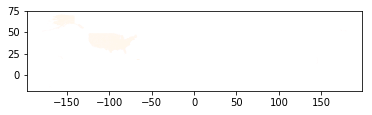

In [12]:
byCounty_worksite.plot(column = 'work_15Q1_CERT_APP', cmap='OrRd', scheme='quantiles')